<a href="https://colab.research.google.com/github/manindersingh120996/Important-Algorithm-function-used-so-far/blob/main/image_segmentation_using_Cholesky_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.linalg import cholesky
from sklearn.mixture import GaussianMixture

# Loading and Preprocessing IMage
image = cv2.imread('segmentation.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image,(5,5), 0)

#defining segmentation function
def segment_image(image):
  # Flattening the image to a 1 Dimensional Array
  flattened_image = image.flatten().reshape(-1,1)
  # Initializing a Gaussian Mixture Model (GMM)
  gmm = GaussianMixture(n_components=4, covariance_type='full',random_state=43)
  #Fitting the Gaussian Mixture Model
  gmm.fit(flattened_image)
  # Getting the mean and covariance of each componenet
  means = gmm.means_
  covariances = gmm.covariances_

  # Here we are using Cholesky Decomposition to compute the inverse of the
  # covariance matrix
  inv_covariances = np.zeros_like(covariances)
  for i in range(len(covariances)):
    inv_covariances[i] = np.linalg.inv(cholesky(covariances[i], lower = True))

  # Computing the likelihood probabilities for each pixel for segmentattions
  likelihooods = np.zeros((len(flattened_image), len(means)))
  for i in range(len(means)):
    diff = flattened_image - means[i]
    exponent = np.sum(np.square(np.dot(diff, inv_covariances[i].T)), axis = 1)
    likelihooods[:, i] = np.exp(-0.5 * exponent) / np.sqrt(np.linalg \
                                                           .det(covariances[i]))

  # assigning each pixel to the component with the highest likelihood
  segmentation = np.argmax(likelihooods, axis = 1).reshape(image.shape)
  return segmentation

segmentation_result = segment_image(gray_image)





Text(0.5, 1.0, 'segmentation_result')

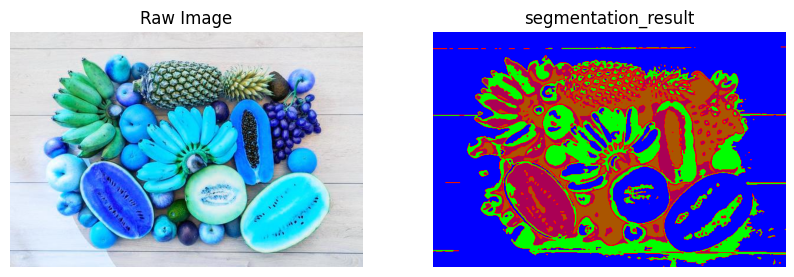

In [81]:
# plt.imshow(segmentation_result)
# create figure
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(image)
plt.axis('off')
plt.title("Raw Image")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(segmentation_result,cmap='brg')
plt.axis('off')
plt.title("segmentation_result")